In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [14]:
# read in the labels of the malicious traffic
traff_lab_path = "/Volumes/TOSHIBA External USB 3.0 Media/Thesis/Datasets/Datasets/IoT/Labelled/ACK_Flooding_Cam_1_labelled.csv"
traff_labels = pd.read_csv(traff_lab_path, skiprows=range(1, 20000*61 + 1), nrows=20000)

In [15]:
traff_labels

,Unnamed: 0,No.,Date_Time,Source,Src_MAC,Src_Port,Destination,Dest_MAC,Dest_Port,Protocol,Length,Info,Label
0,1220000,1220001,2021-07-30 11:43:56.912417,192.168.0.199,98:90:96:9a:86:df,46364.0,192.168.0.151,08:ed:ed:54:21:25,80.0,TCP,60,[TCP ACKed unseen segment] 46364 > 80 [ACK] ...,ACK_Flooding
1,1220001,1220002,2021-07-30 11:43:56.912422,192.168.0.199,98:90:96:9a:86:df,46365.0,192.168.0.151,08:ed:ed:54:21:25,80.0,TCP,60,46365 > 80 [ACK] Seq=221643443 Ack=55785305 ...,ACK_Flooding
2,1220002,1220003,2021-07-30 11:43:56.912427,192.168.0.199,98:90:96:9a:86:df,46366.0,192.168.0.151,08:ed:ed:54:21:25,80.0,TCP,60,[TCP ACKed unseen segment] 46366 > 80 [ACK] ...,ACK_Flooding
3,1220003,1220004,2021-07-30 11:43:56.912431,192.168.0.199,98:90:96:9a:86:df,46368.0,192.168.0.151,08:ed:ed:54:21:25,80.0,TCP,60,[TCP ACKed unseen segment] 46368 > 80 [ACK] ...,ACK_Flooding
4,1220004,1220005,2021-07-30 11:43:56.912435,192.168.0.199,98:90:96:9a:86:df,46371.0,192.168.0.151,08:ed:ed:54:21:25,80.0,TCP,60,[TCP ACKed unseen segment] 46371 > 80 [ACK] ...,ACK_Flooding
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1239995,1239996,2021-07-30 11:43:58.310737,192.168.0.199,98:90:96:9a:86:df,4229.0,192.168.0.151,08:ed:ed:54:21:25,80.0,TCP,60,[TCP ACKed unseen segment] 4229 > 80 [ACK] S...,ACK_Flooding
19996,1239996,1239997,2021-07-30 11:43:58.310755,192.168.0.199,98:90:96:9a:86:df,4230.0,192.168.0.151,08:ed:ed:54:21:25,80.0,TCP,60,[TCP ACKed unseen segment] [TCP Previous segme...,ACK_Flooding
19997,1239997,1239998,2021-07-30 11:43:58.310760,192.168.0.199,98:90:96:9a:86:df,4231.0,192.168.0.151,08:ed:ed:54:21:25,80.0,TCP,60,4231 > 80 [ACK] Seq=3736349258 Ack=398648524...,ACK_Flooding
19998,1239998,1239999,2021-07-30 11:43:58.310765,192.168.0.199,98:90:96:9a:86:df,4233.0,192.168.0.151,08:ed:ed:54:21:25,80.0,TCP,60,4233 > 80 [ACK] Seq=1227513435 Ack=247471770...,ACK_Flooding


# Before mutation

In [16]:
path_latent = "Outputs/Data/IoT_extracted_first/ACK_Flooding_Cam_1/before_manip/original_encodings.pkl"
path_rmse = "Outputs/Data/IoT_extracted_first/ACK_Flooding_Cam_1/before_manip/original_rmse.pkl"

In [17]:
# load latent
latent = np.load(path_latent, allow_pickle=True)

In [18]:
latent = np.array(latent)

In [19]:
latent.shape

(20000, 21)

In [20]:
# load rmse
rmse = np.load(path_rmse, allow_pickle=True)

In [21]:
rmse

array([0.02743899, 0.03130012, 0.03019262, ..., 2.3217499 , 2.32206487,
       2.32238263])

In [9]:
# get the label of each pkt
threshold = 0.5020311945051722

In [10]:
labels = np.where(rmse >= threshold, "Malicious", "Benign")

In [11]:
labels

array(['Benign', 'Benign', 'Benign', ..., 'Malicious', 'Malicious',
       'Malicious'], dtype='<U9')

##### Kitsune accuracy

In [16]:
actual = np.where(traff_labels["Label"].values == "ACK_Flooding", "Malicious", "Benign")

In [17]:
correctly_labelled = np.count_nonzero(actual == labels)

In [18]:
accuracy = correctly_labelled / len(traff_labels)

In [19]:
print(f"The accuracy of Kitsune before manipulation is {accuracy * 100}%")

The accuracy of Kitsune before manipulation is 78.03%


### Eigendecomposition on the encodings


In [14]:
from sklearn.preprocessing import StandardScaler

In [22]:
# standardize
sc = StandardScaler()
latent_std = sc.fit_transform(latent)

In [23]:
# covariance matrix
cov_mat = np.cov(latent_std.T)

In [24]:
# derive the eigenvectors and eigenvalues
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [25]:
# the eigenvalues are already sorted
eigen_vals

array([1.62563642e+01, 3.24512057e+00, 7.13561792e-01, 3.41245428e-01,
       2.49297258e-01, 1.00091819e-01, 4.21418186e-02, 1.91859120e-02,
       1.49348213e-02, 7.49935867e-03, 5.34316069e-03, 2.47283387e-03,
       1.75317140e-03, 6.41076792e-04, 5.47305240e-04, 3.45707619e-04,
       1.02396823e-05, 4.35457605e-05, 7.94581343e-05, 1.25970848e-04,
       2.44644762e-04])

In [26]:
# extract the corresponding eigenvectors of the top 2 eigenvalues
W = eigen_vecs[:, 0:2]

In [27]:
# project the original encodings on w
latent_pca = latent.dot(W)

In [28]:
latent_pca

array([[-0.55480699,  0.19983431],
       [-0.51303869,  0.22718276],
       [-0.50440639,  0.30841122],
       ...,
       [ 1.17618445,  0.89962479],
       [ 1.17618487,  0.89961349],
       [ 1.17618527,  0.89960184]])

### Plot the eigendecomposition of the latent


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
sns.set_theme()

In [30]:
# use svm to help plotting the decision boundry
from sklearn import svm
C = 10.0  # SVM regularization parameter
clf = svm.SVC(kernel = 'linear', C=C)
clf.fit(latent_pca, labels)
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0.6, 1.15)
yy = a * xx - (clf.intercept_[0]) / w[1]

Sample traffic for plotting

In [4]:
rand_idx = np.random.choice(19999, 1000, replace=False)

In [32]:
predicted = np.where(labels == "Malicious", "RMSE >= 0.5", "RMSE < 0.5")

#### The RMSE of the traffic

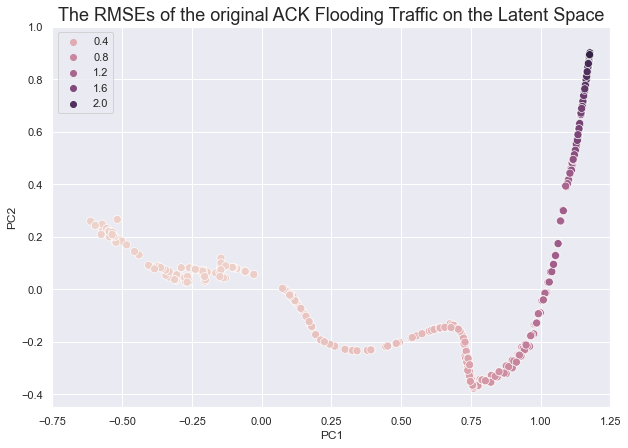

In [41]:
fig, ax = plt.subplots(figsize=(10, 7))
scatter = sns.scatterplot(x=latent_pca[rand_idx, 0], y=latent_pca[rand_idx, 1], hue=rmse[rand_idx],
                ax=ax, s=65)
ax.set_xlim([-0.75, 1.25])
ax.set_ylim([-0.45, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("The RMSEs of the original ACK Flooding Traffic on the Latent Space", fontsize=18)
plt.savefig("Outputs/Figures/IoT_extracted_first/ACK_Flooding_Cam_1/ack_flooding_rmse.png", dpi=300)

In [43]:
scatter.legend()

## After mutation

In [11]:
after_rmse_path = "Outputs/Data/IoT_extracted_first/ACK_Flooding_Cam_1/after_manip/mutated_rmses.pkl"
after_encodings_path = "Outputs/Data/IoT_extracted_first/ACK_Flooding_Cam_1/after_manip/mutated_encodings.pkl"

In [12]:
after_rmse = np.load(after_rmse_path, allow_pickle=True)

In [36]:
aft_labels = np.where(after_rmse >=threshold, "Malicious", "Benign")

In [37]:
after_encodings = np.load(after_encodings_path, allow_pickle=True)

In [38]:
aft_encodings_pca = after_encodings.dot(W)

##### Accuracy

In [42]:
correctly_labelled = np.count_nonzero(aft_labels == actual)

In [43]:
accuracy = correctly_labelled / 20000

In [44]:
print(f"The accuracy of Kitsune after mutation is {accuracy * 100}%")

The accuracy of Kitsune after mutation is 33.29%


#### RMSEs

Text(0.5, 1.0, 'The RMSEs of the Manipulated ACK Flooding Traffic on the Latent Space')

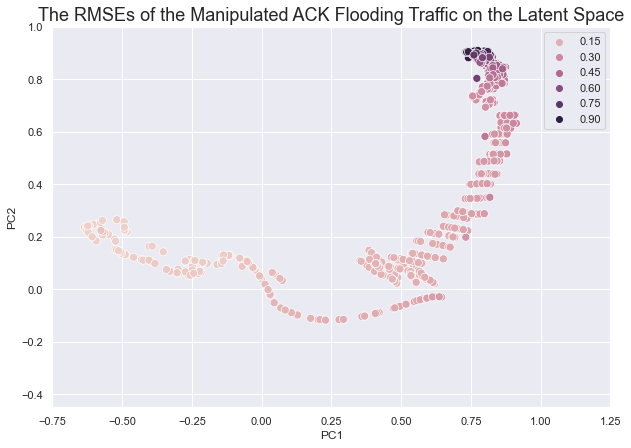

In [45]:
fig, ax = plt.subplots(figsize=(10, 7))
s = sns.scatterplot(x=aft_encodings_pca[rand_idx, 0], y=aft_encodings_pca[rand_idx, 1], hue=after_rmse[rand_idx],
                ax=ax, s=65)
ax.set_xlim([-0.75, 1.25])
ax.set_ylim([-0.45, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("The RMSEs of the Manipulated ACK Flooding Traffic on the Latent Space", fontsize=18)

#### Benign traffic

In [45]:
benign_idx = np.where(actual=="Benign")[0]

In [46]:
benign_idx

array([  250,   251,   252,   253,   254,   255,   256,   257,   529,
         530,   531,   532,   533,   534,   535,   536,   801,   802,
         803,   804,   977,  1085,  1086,  1087,  1088,  1622,  1623,
        1624,  1625,  1626,  1627,  1628,  1629,  1630,  1631,  1632,
        1633,  1634,  1635,  1636,  1637,  1914,  1915,  1916,  1917,
        2190,  2191,  2192,  2193,  2194,  2195,  2196,  2197,  2470,
        2471,  2472,  2473,  2474,  2475,  2476,  2477,  2747,  2748,
        2749,  2750,  2751,  3312,  3313,  3314,  3315,  3316,  3317,
        3318,  3319,  3320,  3321,  3322,  3323,  3324,  3325,  3326,
        3327,  3597,  3598,  3599,  3600,  3865,  3866,  3867,  3868,
        3869,  3870,  3871,  3872,  4145,  4146,  4147,  4148,  4149,
        4150,  4151,  4152,  4435,  4436,  4437,  4438,  4439,  4440,
        4441,  4442,  4727,  4728,  4729,  4730,  4731,  4732,  4733,
        4734,  5012,  5013,  5014,  5015,  5288,  5289,  5290,  5291,
        5292,  5293,

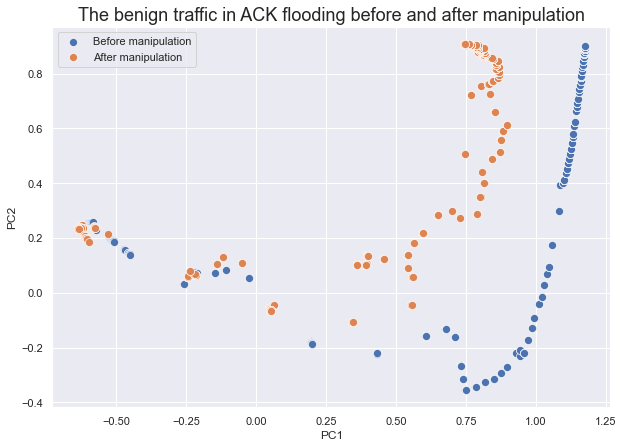

In [48]:
fig, ax = plt.subplots(figsize=(10, 7))

# before
sns.scatterplot(x=latent_pca[benign_idx, 0], y=latent_pca[benign_idx, 1],
                ax=ax, s=65, alpha=1,
                label="Before manipulation")
# after
sns.scatterplot(x=aft_encodings_pca[benign_idx, 0], y=aft_encodings_pca[benign_idx, 1],
                ax=ax, alpha=1,
                s=65, label="After manipulation")
plt.title("The benign traffic in ACK flooding before and after manipulation", fontsize=18)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.savefig("Outputs/Figures/IoT_extracted_first/ACK_Flooding_Cam_1/benign_ack_flooding_before_and_after.png", dpi=300)

#### Malicious traffic

In [49]:
mal_idx = np.where(actual=="Malicious")[0]
mal_idx_sampled = np.random.choice(mal_idx, 1000, replace=False)

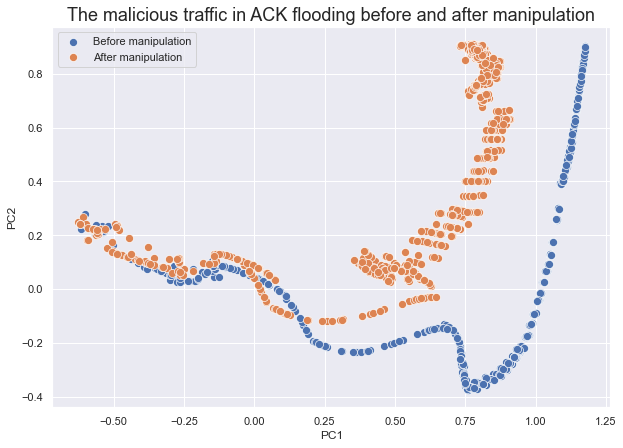

In [51]:
fig, ax = plt.subplots(figsize=(10, 7))

# before
sns.scatterplot(x=latent_pca[mal_idx_sampled, 0], y=latent_pca[mal_idx_sampled, 1],
                ax=ax, s=65, alpha=1,
                label="Before manipulation")
# after
sns.scatterplot(x=aft_encodings_pca[mal_idx_sampled, 0], y=aft_encodings_pca[mal_idx_sampled, 1],
                ax=ax, alpha=1,
                s=65, label="After manipulation")
plt.title("The malicious traffic in ACK flooding before and after manipulation", fontsize=18)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.savefig("Outputs/Figures/IoT_extracted_first/ACK_Flooding_Cam_1/mal_ack_flooding_before_and_after.png", dpi=300)

In [4]:
from pickle import load

In [11]:
from datetime import datetime

In [5]:
# read the timestamp of the mutated traffic
manipulated_path = "Outputs/Data/IoT/no_cft/manipulated.pkl"
with open(manipulated_path, "rb") as fp:
    X = load(fp)

In [13]:
time_mutated = []

In [14]:
for group in X:
    for pkt in group.mal:
        time_mutated.append(datetime.utcfromtimestamp(pkt[0]))

In [26]:
time_original = pd.to_datetime(traff_labels["Date_Time"], format="%Y-%m-%d %H:%M:%S.%f")

In [35]:
time_original_tz = pd.DatetimeIndex(data=time_original, tz="Australia/Brisbane")

In [38]:
time_original_utc = time_original_tz.tz_convert(tz=None)

In [41]:
time_diff = pd.DatetimeIndex(data=time_mutated) - time_original_utc

In [44]:
time_diff.microseconds

Int64Index([     0,     28,     75,    100,    108,    137,    164,    199,
               215,    237,
            ...
            932117, 986353, 988237, 988329, 988526, 999235, 999300, 999317,
            999337, 999355],
           dtype='int64', length=20000)

### Comparison

#### RMSEs

In [16]:
global_min = min(rmse[rand_idx].min(), after_rmse[rand_idx].min())
global_max = max(rmse[rand_idx].max(), after_rmse[rand_idx].max())

In [17]:
global_min

0.012349050418203118

In [18]:
global_max

2.3497434047035317

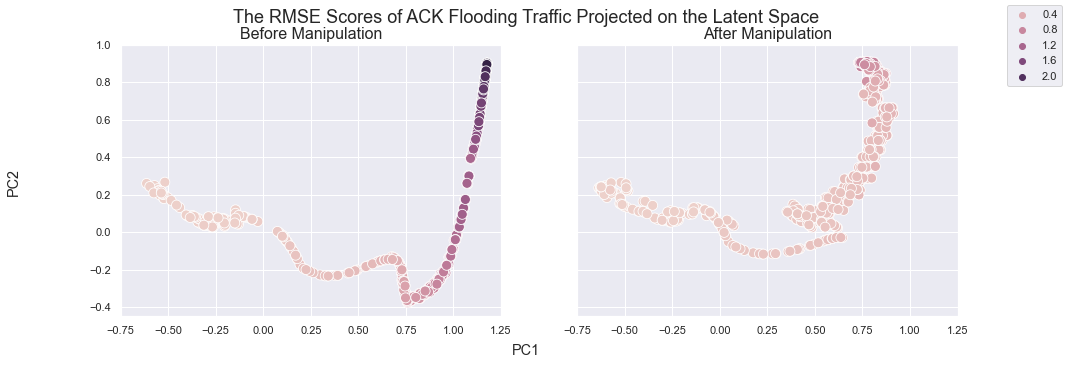

In [68]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
fig.suptitle("The RMSE Scores of ACK Flooding Traffic Projected on the Latent Space", fontsize=18)
global_min = min(rmse[rand_idx].min(), after_rmse[rand_idx].min())
global_max = max(rmse[rand_idx].max(), after_rmse[rand_idx].max())

# before manip
sns.scatterplot(x=latent_pca[rand_idx, 0], y=latent_pca[rand_idx, 1], hue=rmse[rand_idx],
                ax=ax1, s=100, hue_norm=(global_min, global_max))
ax1.set_xlim([-0.75, 1.25])
ax1.set_ylim([-0.45, 1])
handles, labels = ax1.get_legend_handles_labels()
ax1.get_legend().remove()
ax1.set_title("Before Manipulation", fontsize=16)

# after manip
sns.scatterplot(x=aft_encodings_pca[rand_idx, 0], y=aft_encodings_pca[rand_idx, 1], hue=after_rmse[rand_idx],
                ax=ax2, s=100, hue_norm=(global_min, global_max))
fig.legend(handles, labels, loc='upper right')
ax2.set_xlim([-0.75, 1.25])
ax2.get_legend().remove()
ax2.set_title("After Manipulation", fontsize=16)

fig.supxlabel('PC1')
fig.supylabel('PC2')
fig.savefig("Outputs/Figures/IoT_extracted_first/ACK_Flooding_Cam_1/comparison_rmse_latent.png"
            , dpi=500)

### Adjust parameters

#### Number of crafted packets

In [71]:
less_cft_rmse_path = "Outputs/Data/IoT_extracted_first/ACK_Flooding_Cam_1/after_manip/mutated_rmses.pkl"
more_cft_rmse_path = "Outputs/Data/IoT_different_levs/ACK_Flooding_Cam_1/level_0/rmses.pkl"

In [72]:
less_cft_latent_path = "Outputs/Data/IoT_extracted_first/ACK_Flooding_Cam_1/after_manip/mutated_encodings.pkl"
more_cft_latent_path = "Outputs/Data/IoT_different_levs/ACK_Flooding_Cam_1/level_0/encodings.pkl"

In [73]:
less_cft_rmse = np.load(less_cft_rmse_path, allow_pickle=True)
more_cft_rmse = np.load(more_cft_rmse_path, allow_pickle=True)

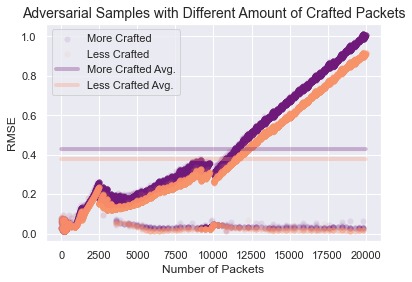

In [103]:
plt.figure(figsize=(6, 4))
x = np.arange(0, len(more_cft_rmse), 1)
plt.scatter(x=x, y=more_cft_rmse, alpha=0.1, linewidth=0, c='#6f1a7a', label="More Crafted")
plt.scatter(x=x, y=less_cft_rmse, alpha=0.1, linewidth=0, c="#ff9369", label="Less Crafted")
plt.plot(x, [np.mean(more_cft_rmse)] * len(more_cft_rmse),
                 c='#6f1a7a',
                 alpha=0.3,
                 linewidth=4, label="More Crafted Avg.")
plt.plot(x, [np.mean(less_cft_rmse)] * len(more_cft_rmse),
         c="#ff9369",
         alpha=0.3,
         linewidth=4, label="Less Crafted Avg.")
plt.xlabel("Number of Packets", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.title("Adversarial Samples with Different Amount of Crafted Packets", fontsize=14)
plt.legend()
plt.savefig("Outputs/Figures/IoT_different_levs/misc./comparison_cft_pkts.png", dpi=500)

#### Interval Time

In [2]:
level_4_rmse_path = "Outputs/Data/IoT_different_levs/ACK_Flooding_Cam_1/level_4/rmses.pkl"
level_5_rmse_path = "Outputs/Data/IoT_different_levs/ACK_Flooding_Cam_1/level_5/rmses.pkl"
level_6_rmse_path = "Outputs/Data/IoT_different_levs/ACK_Flooding_Cam_1/level_6/rmses.pkl"

In [3]:
level_4_rmse = np.load(level_4_rmse_path, allow_pickle=True)
level_5_rmse = np.load(level_5_rmse_path, allow_pickle=True)
level_6_rmse = np.load(level_6_rmse_path, allow_pickle=True)

In [5]:
avg_l4_rmse = np.average(level_4_rmse)
avg_l4_rmse

0.27101712939568834

In [6]:
avg_l5_rmse = np.average(level_5_rmse)
avg_l5_rmse

0.21417333198743924

In [7]:
avg_l6_rmse = np.average(level_6_rmse)
avg_l6_rmse

0.17463570023144215

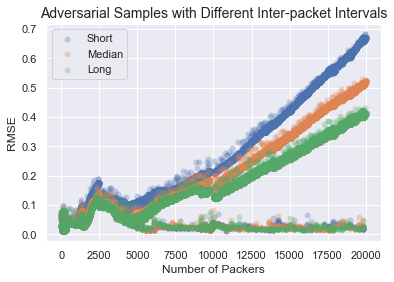

In [104]:
plt.figure(figsize=(6, 4))
num_of_pkts = len(level_4_rmse)
x = np.arange(0, num_of_pkts, 1)
plt.scatter(x=x, y=level_4_rmse, alpha=0.3, linewidth=0, label="Short")
plt.scatter(x=x, y=level_5_rmse, alpha=0.3, linewidth=0, label="Median")
plt.scatter(x=x, y=level_6_rmse, alpha=0.3, linewidth=0, label="Long")
plt.xlabel("Number of Packers", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.title("Adversarial Samples with Different Inter-packet Intervals", fontsize=14)
plt.legend()
plt.savefig("Outputs/Figures/IoT_different_levs/misc./different_interval.png", dpi=500)

In [29]:
level_4_encoding_path = "Outputs/Data/IoT_different_levs/ACK_Flooding_Cam_1/level_4/encodings.pkl"
l4_encoding = np.load(level_4_encoding_path, allow_pickle=True)
l4_latent_pca = l4_encoding.dot(W)

(-0.45, 1.0)

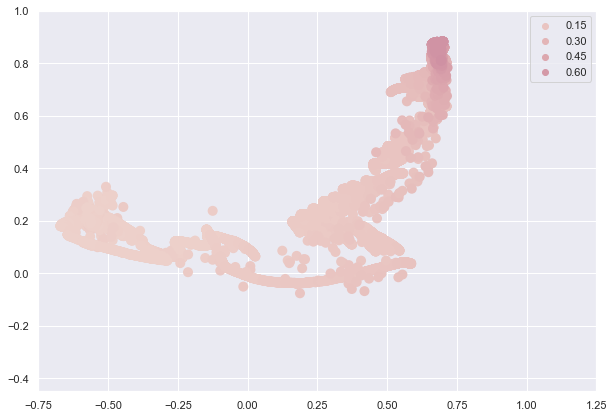

In [123]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(x=l4_latent_pca[:, 0],
                y=l4_latent_pca[:, 1],
                hue=level_4_rmse[:],
                s=100,
                ax=ax,
                linewidth=0,
                hue_norm=(global_min, global_max))
ax.set_xlim([-0.75, 1.25])
ax.set_ylim([-0.45, 1])

(-0.45, 1.0)

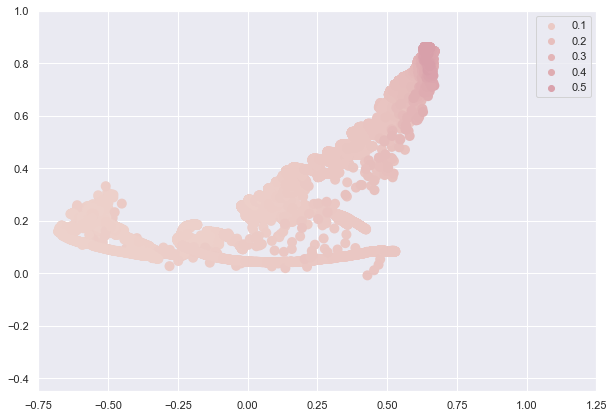

In [30]:
level_5_encoding_path = "Outputs/Data/IoT_different_levs/ACK_Flooding_Cam_1/level_5/encodings.pkl"
l5_encoding = np.load(level_5_encoding_path, allow_pickle=True)
l5_latent_pca = l5_encoding.dot(W)
fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(x=l5_latent_pca[:, 0],
                y=l5_latent_pca[:, 1],
                hue=level_5_rmse[:],
                s=100,
                ax=ax,
                linewidth=0,
                hue_norm=(global_min, global_max))
ax.set_xlim([-0.75, 1.25])
ax.set_ylim([-0.45, 1])

(-0.45, 1.0)

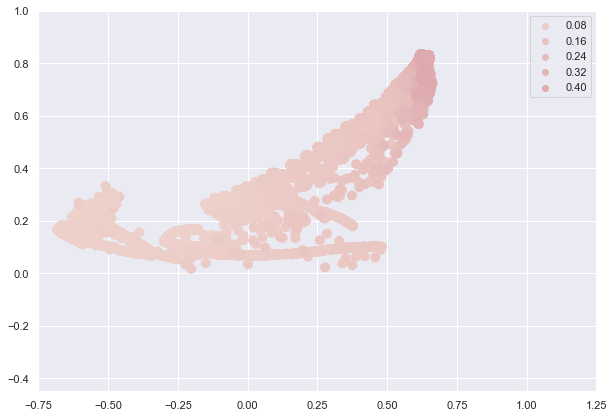

In [31]:
level_6_encoding_path = "Outputs/Data/IoT_different_levs/ACK_Flooding_Cam_1/level_6/encodings.pkl"
l6_encoding = np.load(level_6_encoding_path, allow_pickle=True)
l6_latent_pca = l6_encoding.dot(W)
fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(x=l6_latent_pca[:, 0],
                y=l6_latent_pca[:, 1],
                hue=level_6_rmse[:],
                s=100,
                ax=ax,
                linewidth=0,
                hue_norm=(global_min, global_max))
ax.set_xlim([-0.75, 1.25])
ax.set_ylim([-0.45, 1])

#### Latent space all together

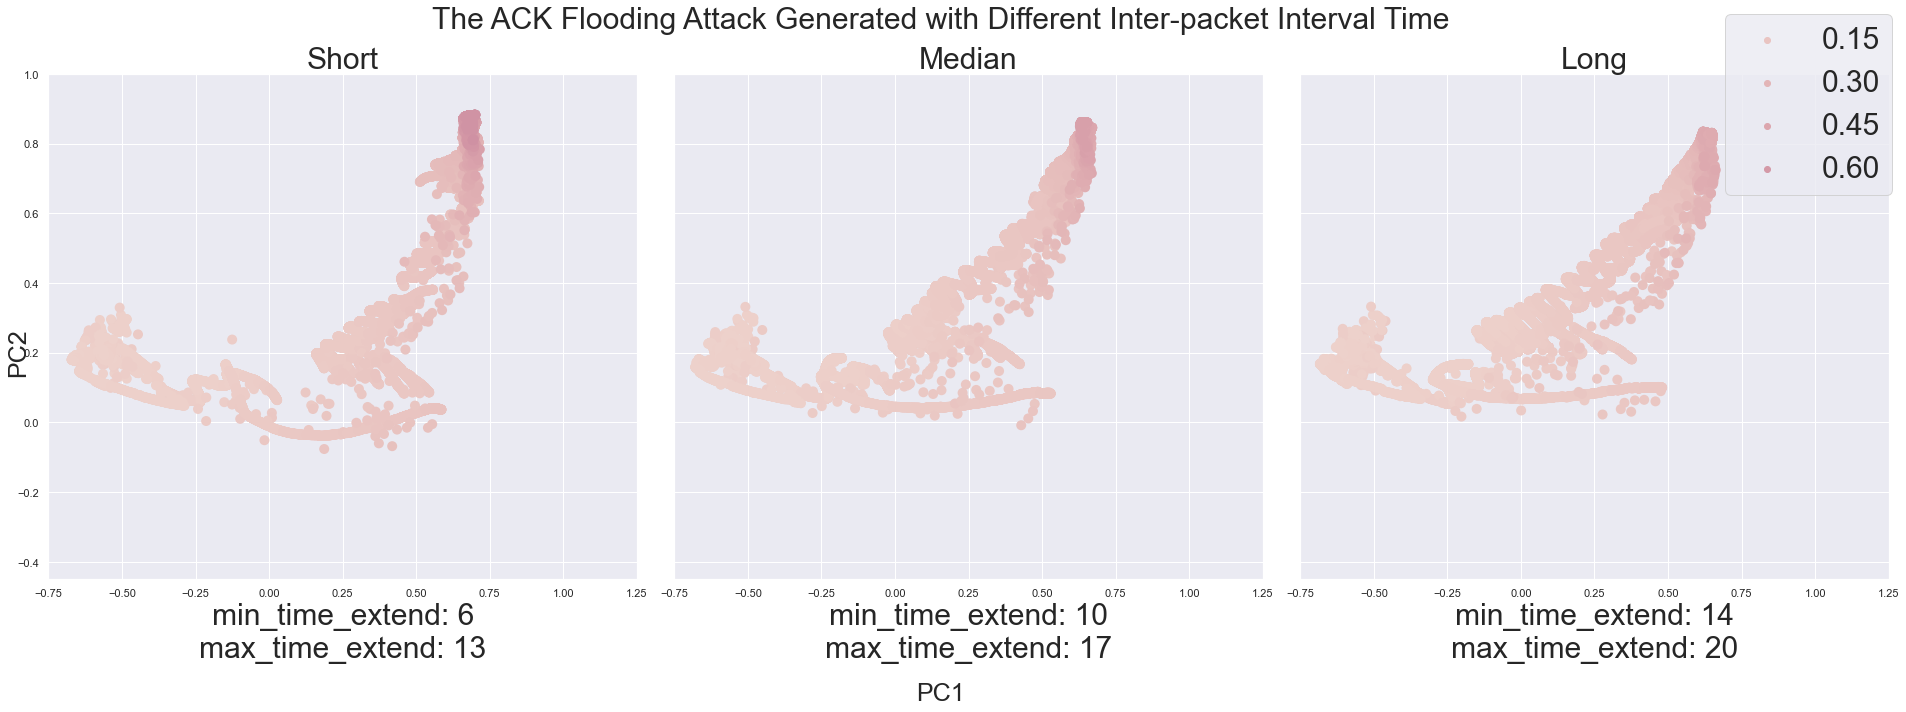

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(27, 10), tight_layout=True)
fig.suptitle("The ACK Flooding Attack Generated with Different Inter-packet Interval Time", fontsize=30)
global_min = min(rmse[rand_idx].min(), after_rmse[rand_idx].min())
global_max = max(rmse[rand_idx].max(), after_rmse[rand_idx].max())

subtitle_font_size = 30
param_font_size = 30

# low
sns.scatterplot(x=l4_latent_pca[:, 0],
                y=l4_latent_pca[:, 1],
                hue=level_4_rmse[:],
                s=100,
                ax=ax1,
                linewidth=0,
                hue_norm=(global_min, global_max))
ax1.set_xlim([-0.75, 1.25])
ax1.set_ylim([-0.45, 1])
handles, labels = ax1.get_legend_handles_labels()
ax1.get_legend().remove()
ax1.set_title("Short", fontsize=subtitle_font_size)
ax1.set_xlabel("min_time_extend: 6\nmax_time_extend: 13", fontsize=param_font_size)

# median
sns.scatterplot(x=l5_latent_pca[:, 0],
                y=l5_latent_pca[:, 1],
                hue=level_5_rmse[:],
                s=100,
                ax=ax2,
                linewidth=0,
                hue_norm=(global_min, global_max))
ax2.set_xlim([-0.75, 1.25])
ax2.get_legend().remove()
ax2.set_title("Median", fontsize=subtitle_font_size)
ax2.set_xlabel("min_time_extend: 10\nmax_time_extend: 17", fontsize=param_font_size)

# high
sns.scatterplot(x=l6_latent_pca[:, 0],
                y=l6_latent_pca[:, 1],
                hue=level_6_rmse[:],
                s=100,
                ax=ax3,
                linewidth=0,
                hue_norm=(global_min, global_max))
ax3.set_xlim([-0.75, 1.25])
ax3.get_legend().remove()
ax3.set_title("Long", fontsize=subtitle_font_size)
ax3.set_xlabel("min_time_extend: 14\nmax_time_extend: 20", fontsize=param_font_size)

fig.legend(handles, labels, loc='upper right', prop={'size':30})
fig.supxlabel('PC1', fontsize=25)
fig.supylabel('PC2', fontsize=25)
fig.savefig("Outputs/Figures/IoT_different_levs/misc./interval_latent.png"
            , dpi=500)

#### Latent Space adding crafted packets

In [148]:
l3_encoding_path = "Outputs/Data/IoT_different_levs/ACK_Flooding_Cam_1/level_3/encodings.pkl"
l3_encoding = np.load(l3_encoding_path, allow_pickle=True)
l3_latent_pca = l3_encoding.dot(W)

In [149]:
l3_rmse_path = "Outputs/Data/IoT_different_levs/ACK_Flooding_Cam_1/level_3/rmses.pkl"
l3_rmse = np.load(l3_rmse_path, allow_pickle=True)

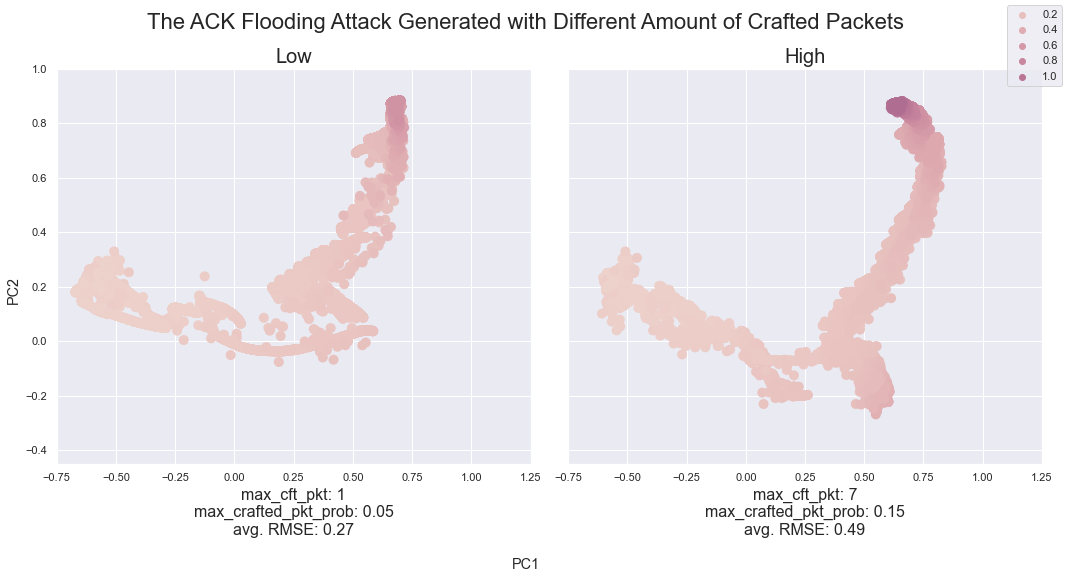

In [158]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 8), tight_layout=True)
fig.suptitle("The ACK Flooding Attack Generated with Different Amount of Crafted Packets", fontsize=22)
# global_min = min(rmse[rand_idx].min(), after_rmse[rand_idx].min())
# global_max = max(rmse[rand_idx].max(), after_rmse[rand_idx].max())

# low
sns.scatterplot(x=l4_latent_pca[:, 0],
                y=l4_latent_pca[:, 1],
                hue=level_4_rmse[:],
                s=100,
                ax=ax1,
                linewidth=0,
                hue_norm=(global_min, global_max))
ax1.set_xlim([-0.75, 1.25])
ax1.set_ylim([-0.45, 1])
ax1.get_legend().remove()
ax1.set_title("Low", fontsize=20)
ax1.set_xlabel(f"max_cft_pkt: 1\nmax_crafted_pkt_prob: 0.05\navg. RMSE: {round(np.average(level_4_rmse), 2)}", fontsize=16)

# high
sns.scatterplot(x=l3_latent_pca[:, 0],
                y=l3_latent_pca[:, 1],
                hue=l3_rmse[:],
                s=100,
                ax=ax2,
                linewidth=0,
                hue_norm=(global_min, global_max))
ax2.set_xlim([-0.75, 1.25])
handles, labels = ax2.get_legend_handles_labels()
ax2.get_legend().remove()
ax2.set_title("High", fontsize=20)
ax2.set_xlabel(f"max_cft_pkt: 7\nmax_crafted_pkt_prob: 0.15\navg. RMSE: {round(np.average(l3_rmse), 2)}", fontsize=16)

fig.legend(handles, labels, loc='upper right')
fig.supxlabel('PC1')
fig.supylabel('PC2')

fig.savefig("Outputs/Figures/IoT_different_levs/misc./interval_cft.png"
            , dpi=500)

#### Self-organizing Map

In [53]:
from minisom import MiniSom

In [54]:
latent_normed = (latent - np.mean(latent, axis=0)) / np.std(latent, axis=0)

In [56]:
# Initialization and training
n_neurons = 9
m_neurons = 9
som = MiniSom(n_neurons, m_neurons, latent_normed.shape[1], sigma=1.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=0)

som.pca_weights_init(latent_normed)
som.train(latent_normed, 1000, verbose=True)  # random training

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 2.532027478455334


In [73]:
# sample data points for display
num_of_samples = 1000
idx_sampled = np.random.choice(np.arange(0, len(latent)), num_of_samples, replace=False)

In [57]:
w_x, w_y = zip(*[som.winner(d) for d in latent_normed])
w_x = np.array(w_x)
w_y = np.array(w_y)

/var/folders/pc/bdg_4qpn5t3dnr8zf1zs9xkr0000gn/T/ipykernel_46397/2055910551.py:2: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
/var/folders/pc/bdg_4qpn5t3dnr8zf1zs9xkr0000gn/T/ipykernel_46397/2055910551.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()
/Users/essiezhang/anaconda3/envs/network/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


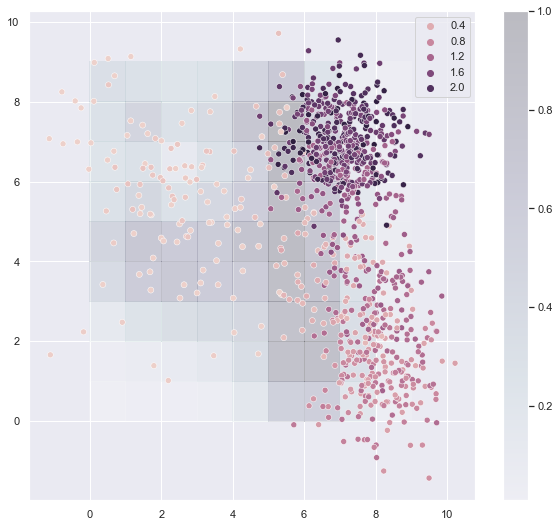

In [74]:
plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

sns.scatterplot(w_x[idx_sampled] + .5 + (np.random.normal(0, 1, num_of_samples)-.5) * .8,
                w_y[idx_sampled] + .5 + (np.random.normal(0, 1, num_of_samples)-.5) * .8,
                hue=rmse[idx_sampled])

plt.legend(loc='upper right')
plt.grid()
# plt.savefig('resulting_images/som_seed.png')
plt.show()

In [71]:
w_y[idx_sampled]

array([3, 7, 7, 7, 1, 1, 6, 7, 6, 7, 2, 7, 6, 3, 3, 7, 6, 6, 7, 4, 1, 7,
       6, 8, 3, 7, 7, 4, 5, 1, 7, 1, 7, 6, 1, 7, 1, 4, 3, 1, 6, 1, 8, 7,
       7, 7, 1, 7, 1, 1, 6, 1, 7, 1, 6, 5, 1, 3, 8, 7, 4, 7, 2, 7, 7, 1,
       7, 1, 3, 1, 4, 6, 7, 7, 1, 7, 4, 7, 7, 7, 7, 7, 4, 6, 7, 7, 5, 2,
       6, 1, 7, 4, 7, 7, 2, 7, 7, 2, 7, 1, 7, 2, 6, 3, 4, 5, 7, 4, 7, 5,
       7, 1, 4, 7, 2, 7, 1, 7, 7, 1, 2, 7, 7, 7, 2, 6, 1, 7, 6, 7, 7, 7,
       5, 1, 1, 6, 7, 6, 7, 4, 3, 2, 5, 7, 7, 7, 2, 5, 7, 7, 8, 7, 1, 7,
       7, 7, 7, 3, 1, 1, 6, 1, 1, 7, 7, 7, 7, 7, 7, 1, 7, 7, 3, 7, 1, 2,
       2, 3, 7, 2, 7, 2, 4, 6, 1, 4, 8, 1, 7, 2, 7, 1, 7, 4, 2, 6, 7, 7,
       6, 6, 7, 6, 6, 3, 1, 1, 3, 7, 7, 3, 1, 4, 3, 7, 6, 7, 3, 7, 4, 1,
       7, 7, 7, 7, 1, 7, 7, 7, 6, 7, 7, 7, 3, 7, 7, 5, 4, 6, 1, 6, 1, 7,
       7, 7, 7, 6, 7, 7, 7, 1, 7, 7, 6, 6, 8, 7, 6, 3, 4, 7, 6, 7, 4, 6,
       1, 7, 6, 7, 1, 6, 7, 6, 7, 3, 6, 7, 6, 5, 7, 7, 6, 1, 6, 4, 6, 7,
       2, 6, 6, 6, 1, 7, 3, 5, 7, 6, 7, 7, 3, 5, 1,